In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
import pandas as pd
import warnings
warnings.filterwarnings("ignore")


In [2]:
#importing data
dataset_train = pd.read_csv("C:/Users/dell/Documents/DS_Assignments/12_Naive_bayes/SalaryData_Train.csv")
dataset_test = pd.read_csv("C:/Users/dell/Documents/DS_Assignments/12_Naive_bayes/SalaryData_Test.csv")

In [3]:
dataset_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
dataset_train.columns.unique()

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [5]:
dataset_train['Salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [6]:
dataset_train['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [7]:
dataset_train['native'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary'], dtype=object)

In [8]:
dataset_train['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [9]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [10]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [11]:
def confusion_matrix(y_test,y_pred):
    from sklearn.metrics import confusion_matrix
    confusion = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(conf_mat=confusion)
    plt.show()


In [12]:
def classification_report(y_test,y_pred):
    # importing accuracy_score, precision_score, recall_score, f1_score
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

    print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

    print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
    print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
    print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

    print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
    print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
    print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

    print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
    print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
    print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))
    
    from sklearn.metrics import classification_report
    print('\nClassification Report\n')
    print(classification_report(y_test, y_pred))
    

In [13]:
def ROC_AUC(y_test,y_pred_prob):
    classes = np.unique(y_test)

    fpr, tpr, thresh = roc_curve(y_test, y_pred_prob[:,1], pos_label=1)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, linestyle='--', label='%s (AUC=%0.2f)' % (classes, roc_auc))

    plt.title('ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc='lower right')
    plt.show()

   
    auc_score = roc_auc_score(y_test, y_pred_prob[:,1])
    print("AUC_Score: ",auc_score)

Accuracy of naive bayes classifier on training set: 0.7953
Accuracy of naive bayes classifier on test set: 0.7947


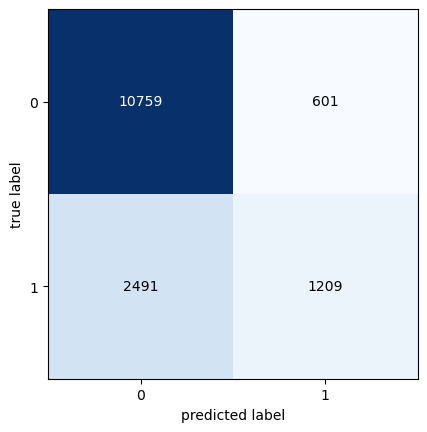


Accuracy: 0.79

Micro Precision: 0.79
Micro Recall: 0.79
Micro F1-score: 0.79

Macro Precision: 0.74
Macro Recall: 0.64
Macro F1-score: 0.66

Weighted Precision: 0.78
Weighted Recall: 0.79
Weighted F1-score: 0.77

Classification Report

              precision    recall  f1-score   support

           0       0.81      0.95      0.87     11360
           1       0.67      0.33      0.44      3700

    accuracy                           0.79     15060
   macro avg       0.74      0.64      0.66     15060
weighted avg       0.78      0.79      0.77     15060



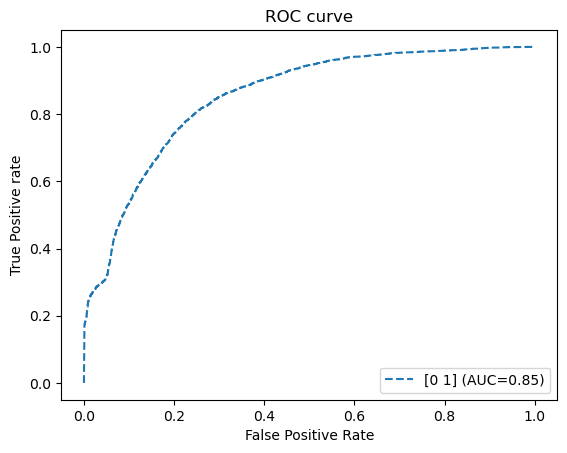

AUC_Score:  0.8523163898934146


In [15]:
def model_NB(dataset_train,dataset_test):
        
    from sklearn import preprocessing
    label_encoder = preprocessing.LabelEncoder()
   
    dataset_train['workclass']= label_encoder.fit_transform(dataset_train['workclass'])
    dataset_train['education']= label_encoder.fit_transform(dataset_train['education'])
    dataset_train['maritalstatus']= label_encoder.fit_transform(dataset_train['maritalstatus'])
    dataset_train['occupation']= label_encoder.fit_transform(dataset_train['occupation'])
    dataset_train['relationship']= label_encoder.fit_transform(dataset_train['relationship'])
    dataset_train['race']= label_encoder.fit_transform(dataset_train['race'])
    dataset_train['sex']= label_encoder.fit_transform(dataset_train['sex'])
    dataset_train['native']= label_encoder.fit_transform(dataset_train['native'])
    dataset_train['Salary']= label_encoder.fit_transform(dataset_train['Salary'])
    
    dataset_test['workclass']= label_encoder.fit_transform(dataset_test['workclass'])
    dataset_test['education']= label_encoder.fit_transform(dataset_test['education'])
    dataset_test['maritalstatus']= label_encoder.fit_transform(dataset_test['maritalstatus'])
    dataset_test['occupation']= label_encoder.fit_transform(dataset_test['occupation'])
    dataset_test['relationship']= label_encoder.fit_transform(dataset_test['relationship'])
    dataset_test['race']= label_encoder.fit_transform(dataset_test['race'])
    dataset_test['sex']= label_encoder.fit_transform(dataset_test['sex'])
    dataset_test['native']= label_encoder.fit_transform(dataset_test['native'])
    dataset_test['Salary']= label_encoder.fit_transform(dataset_test['Salary'])
    
    
    X_train = dataset_train.iloc[:,:-1] 
    y_train = dataset_train.iloc[:,-1]
    X_test = dataset_test.iloc[:,:-1] 
    y_test = dataset_test.iloc[:,-1]
  
   
        
    from sklearn.naive_bayes import GaussianNB
    clf = GaussianNB()
    clf.fit(X_train, y_train)
    print('Accuracy of naive bayes classifier on training set: {:.4f}'
          .format(clf.score(X_train, y_train)))
    print('Accuracy of naive bayes classifier on test set: {:.4f}'
          .format(clf.score(X_test, y_test)))
    
    y_pred=clf.predict(X_test)
    y_pred_prob=clf.predict_proba(X_test)

    
    confusion_matrix(y_test,y_pred)


    classification_report(y_test,y_pred)

    ROC_AUC(y_test,y_pred_prob)
    
model_NB(dataset_train,dataset_test)


Accuracy of mixed naive bayes classifier on training set: 0.8272
Accuracy of mixed naive bayes classifier on test set: 0.8242


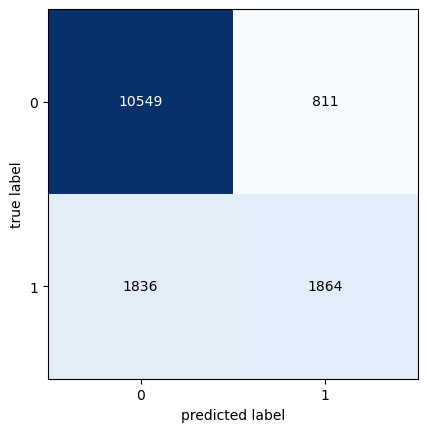


Accuracy: 0.82

Micro Precision: 0.82
Micro Recall: 0.82
Micro F1-score: 0.82

Macro Precision: 0.77
Macro Recall: 0.72
Macro F1-score: 0.74

Weighted Precision: 0.81
Weighted Recall: 0.82
Weighted F1-score: 0.81

Classification Report

              precision    recall  f1-score   support

           0       0.85      0.93      0.89     11360
           1       0.70      0.50      0.58      3700

    accuracy                           0.82     15060
   macro avg       0.77      0.72      0.74     15060
weighted avg       0.81      0.82      0.81     15060



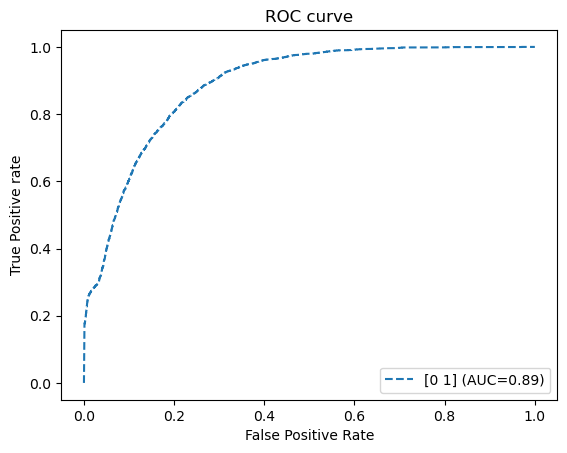

AUC_Score:  0.887781916159117


In [16]:
def model_NB(dataset_train,dataset_test):
        
    from sklearn import preprocessing
    label_encoder = preprocessing.LabelEncoder()
   
    dataset_train['workclass']= label_encoder.fit_transform(dataset_train['workclass'])
    dataset_train['education']= label_encoder.fit_transform(dataset_train['education'])
    dataset_train['maritalstatus']= label_encoder.fit_transform(dataset_train['maritalstatus'])
    dataset_train['occupation']= label_encoder.fit_transform(dataset_train['occupation'])
    dataset_train['relationship']= label_encoder.fit_transform(dataset_train['relationship'])
    dataset_train['race']= label_encoder.fit_transform(dataset_train['race'])
    dataset_train['sex']= label_encoder.fit_transform(dataset_train['sex'])
    dataset_train['native']= label_encoder.fit_transform(dataset_train['native'])
    dataset_train['Salary']= label_encoder.fit_transform(dataset_train['Salary'])
    
    dataset_test['workclass']= label_encoder.fit_transform(dataset_test['workclass'])
    dataset_test['education']= label_encoder.fit_transform(dataset_test['education'])
    dataset_test['maritalstatus']= label_encoder.fit_transform(dataset_test['maritalstatus'])
    dataset_test['occupation']= label_encoder.fit_transform(dataset_test['occupation'])
    dataset_test['relationship']= label_encoder.fit_transform(dataset_test['relationship'])
    dataset_test['race']= label_encoder.fit_transform(dataset_test['race'])
    dataset_test['sex']= label_encoder.fit_transform(dataset_test['sex'])
    dataset_test['native']= label_encoder.fit_transform(dataset_test['native'])
    dataset_test['Salary']= label_encoder.fit_transform(dataset_test['Salary'])
    
#     y['y']= label_encoder.fit_transform(y['y'])
#     X=pd.get_dummies(columns=['native','job','sex','contact','poutcome'],data=X)
    
    X_train = dataset_train.iloc[:,:-1] 
    y_train = dataset_train.iloc[:,-1]
    X_test = dataset_test.iloc[:,:-1] 
    y_test = dataset_test.iloc[:,-1]
  
   
        
    from mixed_naive_bayes import MixedNB
    clf = MixedNB(categorical_features=[1,2,4,5,6,7,8,12])
    clf.fit(X_train, y_train)
    print('Accuracy of mixed naive bayes classifier on training set: {:.4f}'
          .format(clf.score(X_train, y_train)))
    print('Accuracy of mixed naive bayes classifier on test set: {:.4f}'
          .format(clf.score(X_test, y_test)))
    
    y_pred=clf.predict(X_test)
    y_pred_prob=clf.predict_proba(X_test)
    
    
    confusion_matrix(y_test,y_pred)


    classification_report(y_test,y_pred)

    ROC_AUC(y_test,y_pred_prob)
    
model_NB(dataset_train,dataset_test)


## Since the data contain both categorical and numerical data mixed-naive-bayes gives higher accuracy than gaussian-naive-bayes. Hence this model can be used for salary classification.
